# Programming with Python

### Scikit-Learn
Scikit-Learn provides functions to support machine learning in Python. It includes algorithms for classification, regression, and clustering
https://scikit-learn.org/stable/

In [1]:
#Using scikit-learn to do classification
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# Read csv from URL
csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names =['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris_dataframe = pd.read_csv(csv_url, names=col_names)
# X = Measurements, Y = Classification
X = iris_dataframe.iloc[:,:-1]
Y = iris_dataframe.iloc[:,-1]
# Converting into numpy array with sepal length and sepal width
X = X.to_numpy()[:,(0,1)]
Y = Y.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
# Splitting into train and test sets
X_train, X_test, y_train, Y_test = train_test_split(X,Y,test_size=0.5, random_state=42)
# Run logistic regression
log_reg = LogisticRegression()
log_reg.fit(X,Y)
# Testing the logistic regression model
training_prediction = log_reg.predict(X_train)
test_prediction = log_reg.predict(X_test)
print(metrics.classification_report(y_train, training_prediction, digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        21
           1      0.750     0.778     0.764        27
           2      0.769     0.741     0.755        27

    accuracy                          0.827        75
   macro avg      0.840     0.840     0.839        75
weighted avg      0.827     0.827     0.827        75



In [3]:
#Implementing K-Means Clustering
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

In [5]:
csv_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names =['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris_dataframe = pd.read_csv(csv_url, names=col_names)
X = iris_dataframe.iloc[:,:-1]
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [6]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

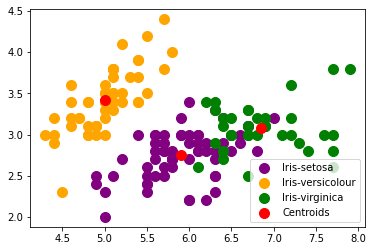

In [13]:
cols = iris_dataframe.columns 
plt.scatter(X.loc[y_kmeans == 0, cols[0]], 
            X.loc[y_kmeans == 0, cols[1]], 
            s=100, c='purple', 
            label='Iris-setosa') 
plt.scatter(X.loc[y_kmeans == 1, cols[0]], 
            X.loc[y_kmeans == 1, cols[1]], 
            s=100, c='orange', 
            label='Iris-versicolour') 
plt.scatter(X.loc[y_kmeans == 2, cols[0]], 
            X.loc[y_kmeans == 2, cols[1]], 
            s=100, c='green', 
            label='Iris-virginica') 
  
# Plotting the centroids of the clusters 
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=100, c='red', 
            label='Centroids') 
  
plt.legend() 